In [1]:
pip install flatten_json 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for flatten-json: filename=flatten_json-0.1.13-py3-none-any.whl size=7979 sha256=36c0a9970b0352f80ae4e394a5196388962bee63e354432294d80ee1c04171c9
  Stored in directory: /root/.cache/pip/wheels/e6/b3/2a/beb2ceb72d11bf335f9c2f87aae26981f6744f3fc885cde665
Successfully built flatten-json


In [2]:
#Do you know the number of levels Y/n
import pandas as pd
import requests
import time
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np
from flatten_json import flatten


Do you Know the Experise Level? (yes or no) no
2
Do you know the number of users you want to cluster 2
Processed page 1, returned <Response [200]>
Processed page 2, returned <Response [200]>
                                                  tags  \
0    [python, tensorflow, machine-learning, keras, ...   
1                          [python, tensorflow, keras]   
2                     [python, tensorflow, valueerror]   
3           [python, tensorflow, keras, deep-learning]   
4                          [python, tensorflow, keras]   
..                                                 ...   
195        [python, tensorflow, keras, neural-network]   
196  [python, tensorflow, keras, deep-learning, seq...   
197         [python, pandas, numpy, matplotlib, scipy]   
198  [tensorflow, installation, ubuntu-18.04, proto...   
199  [python, tensorflow, machine-learning, neural-...   

                                                 owner  is_answered  \
0    {'account_id': 22188570, 'reputation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


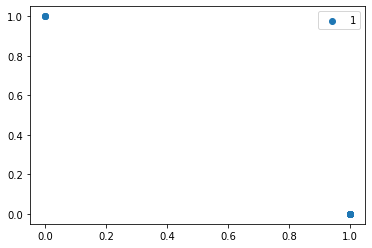

In [3]:


def question():
    value_of_k = 0
    i = 0
    while i < 2:
        answer = input("Do you Know the Experise Level? (yes or no) ")
        if any(answer.lower() == f for f in ["yes", 'y', '1', 'ye']):
            value_of_k = int(answer)
            break

        elif any(answer.lower() == f for f in ['no', 'n', '0']):
            value_of_k = 2
            print(value_of_k)
            break
        else:
            i += 1
            if i < 2:
                print('Please enter yes or no')
            else:
                print("Nothing done")
    return value_of_k  


# question()
question()

# Either Python or Tensorflow ?
#import the dataset for the TENSORFLOW tags from the STACKEXCHANGE API

def query_stack_exchange():
  number_of_pages = input("Do you know the number of users you want to cluster ")
  complete_data=[]
  dfs = []
  for i in range (int(number_of_pages)):
    response = requests.get("https://api.stackexchange.com/2.3/search/advanced?order=desc&sort=activity&q=tensorflow,python&site=stackoverflow&filter=!*MZqiH2P51Zpclr2&pagesize=100&page=" + str(i + 1))
    newData =json.loads(response.text)
    # newData = flatten(newData_unflatten)
    # print(newData)
    for item in newData["items"]:
        # item = flatten(item)
        # print(item)
        complete_data.append(item)
        dfs.append(pd.DataFrame([item]))
    print("Processed page " + str(i + 1) + ", returned " + str(response))
    time.sleep(2) # timeout not to be rate-limited
    # key=BmopG%29d9Thccirg4e%29CjOw%28%28&page="+ str(page_count) + "&pagesize=100&order=desc&sort=activity&q=" +  row + "&site=stackoverflow"
  df = pd.concat(dfs, ignore_index=True, sort=False)
  print(df)
  dataStackexchange = df.to_csv('dataStackExchange.csv', encoding='utf-8', index=False)
  #import the dataset for the 150 Elements
  dataset_path = "dataStackExchange.csv"
  dataset = pd.read_csv(dataset_path)#, error_bad_lines=False)
  # dataset = dataset.astype({"owner_account_id":"int","owner_reputation":"int", "owner_user_id": "int"})
  #print(error_bad_lines)

  # Fill missing values with mean column values in the data set
  dataset.fillna(dataset.mean(), inplace=True)
  #select the columns you wanna train your data with SET 2:[Upvotes, Downvotes]
  X = df.loc[:, ['down_vote_count', 'up_vote_count']].values
  # #Transform the data
  # df = pca.fit_transform(X)
  # when it is not-manual it is giving me an error 
  kmeans5 = KMeans(n_clusters=2)
  y_kmeans5 = kmeans5.fit_predict(X)
  print(y_kmeans5)
  dataset['cluster'] = y_kmeans5
  # userIDCluster = df['owner'].apply(pd.Series)
  # userIDCluster = pd.concat( dataset,userIDCluster ,ignore_index=True, sort=False)
  # print(userIDCluster)
  #Getting unique label
  u_labels = np.unique(y_kmeans5)
  print(u_labels)
  #plotting the results:
 
  # for i in u_labels:
  plt.scatter(dataset.cluster == 0 , dataset.cluster == 1, label = i)
  plt.legend()
  plt.show()
  dataset[dataset.cluster == 0].to_csv("set1_First_Cluster_Tensorflow.csv")
  dataset[dataset.cluster == 1].to_csv("set1_Second_Cluster_Tensorflow.csv")
  return newData

newData_unflattned= query_stack_exchange()
# cluster_method()
#filter rows of original data
# filtered_label0 = [dataset.cluster == 0]
 
# filtered_label1 = [dataset.cluster == 1]
 
# #Plotting the results
# plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
# plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
# plt.show()






In [4]:
def query_user_id():

  # newData_flattened = flatten(newData_unflattned)
  dfs = []
  for item in newData_unflattned["items"]:
     item = flatten(item)
    #  print(item)
     dfs.append(pd.DataFrame([item]))
  df = pd.concat(dfs, ignore_index=True, sort=False)
  dataStackexchange = df.to_csv('dataStackExchange.csv', encoding='utf-8', index=False)
  #import the dataset for the 150 Elements
  dataset_path = "dataStackExchange.csv"
  dataset = pd.read_csv(dataset_path)#, error_bad_lines=False)
  # Fill missing values with mean column values in the data set
  dataset.fillna(dataset.mean(), inplace=True)
  # convert values to int
  dataset = dataset.astype({"owner_account_id":"int","owner_reputation":"int", "owner_user_id": "int"})
  #select the columns you wanna train your data with SET 2:[Upvotes, Downvotes]
  X = df.loc[:, ['down_vote_count', 'up_vote_count']].values
  # #Transform the data
  # df = pca.fit_transform(X)
  # when it is not-manual it is giving me an error 
  kmeans5 = KMeans(n_clusters=2)
  y_kmeans5 = kmeans5.fit_predict(X)
  print(y_kmeans5)
  dataset['cluster'] = y_kmeans5   
  # dataset = dataset.astype({"owner_account_id":"int","owner_reputation":"int", "owner_user_id": "int"})
  print(dataset)
  user_id = input("Enter the is of the user you wish to query for: ")
  # ddata = dataset.loc[(dataset['owner_user_id'] == user_id) & (dataset['cluster'] == 0)]

  print(dataset.loc[dataset['cluster'] == 1])
  # if dataset[(dataset.owner_user_id == user_id) & (dataset.cluster == 0)].all():
  #   print("Yes, USER ID found in Cluster 0" )
  # if dataset[(dataset.owner_user_id == user_id) & (dataset.cluster == 1)].all():
  #   print("Yes, USER ID found in Cluster 1" )
  # else:
  #   print("user is not in clustered data")

query_user_id()
# # Kmeans clustering

# # Output a percentage

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
        tags_0        tags_1            tags_2          tags_3  \
0       python    tensorflow  machine-learning           keras   
1       python    python-3.x        tensorflow             nlp   
2       python    tensorflow               NaN             NaN   
3       python    tensorflow  machine-learning           keras   
4       python    tensorflow             keras  neural-network   
..         ...           ...               ...             ...   
95      python    tensorflow             keras  neural-network   
96      python    tensorflow             keras   deep-learning   
97      python        pandas             numpy      matplotlib   
98  tensorflow  installation      ubuntu-18.04          protoc   
99      python    tensorflow  machine-learning  neural-network   

   